In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn import svm
import seaborn as sns
import pickle

In [ ]:
df1 = pd.read_csv(r'/content/drive/My Drive/MACHINE LEARNING/MLDataset/train-ml.csv')
data = pd.DataFrame(df1.loc[ : , 'pixel0':'pixel783'])
target = pd.DataFrame(df1.loc[ : , ['label']])
data = data.to_numpy()
# print(data)
target = target.to_numpy()
# print(target)
final_target = target.flatten()

In [ ]:
df2 = pd.read_csv(r'/content/drive/My Drive/MACHINE LEARNING/MLDataset/test-ml.csv')
test_data = pd.DataFrame(df2.loc[ : , 'pixel0':'pixel783'])
test_data = test_data.to_numpy()

In [ ]:

classifier = svm.SVC()
classifier = classifier.fit(data , final_target)


In [ ]:
y_predict = classifier.predict(test_data)

In [ ]:
true_test = pd.DataFrame(df2.loc[ : , ['label']])
true_test = true_test.to_numpy()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_test, y_predict))

              precision    recall  f1-score   support

        face       0.89      0.96      0.92       299
      masked       0.95      0.87      0.91       281

    accuracy                           0.92       580
   macro avg       0.92      0.91      0.92       580
weighted avg       0.92      0.92      0.92       580



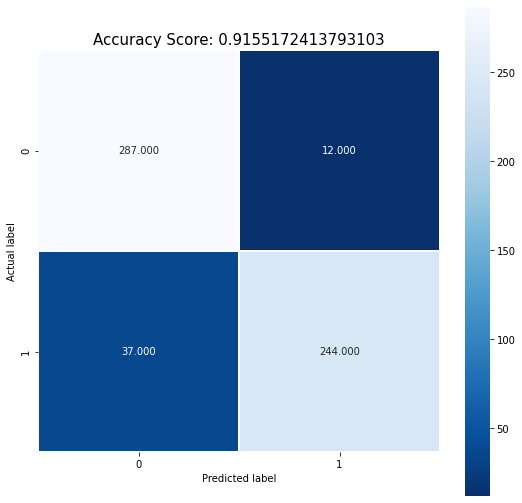

In [ ]:
from sklearn.metrics import confusion_matrix
score = classifier.score(test_data,true_test)
cm = confusion_matrix(true_test,y_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
filename = 'SVMmodel.pickle'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
filename = '/content/drive/MyDrive/MACHINE LEARNING/ML MODELS/SVMmodel.pickle'
loaded_model = pickle.load(open(filename, 'rb'))

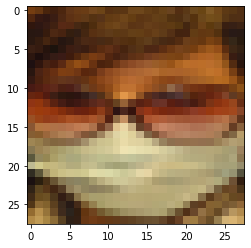

In [ ]:
from PIL import Image

path = '/content/drive/MyDrive/MACHINE LEARNING/MLDataset/val/AFDB_masked_face_dataset/0_0_0 (10).jpg'
img = np.array(Image.open(path).resize((28, 28)))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
test_img = imgGray.flatten()
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
y = loaded_model.predict(test_img)
print(y)

['masked']


Text(0.5, 1.0, 'Performance of SVM Model')

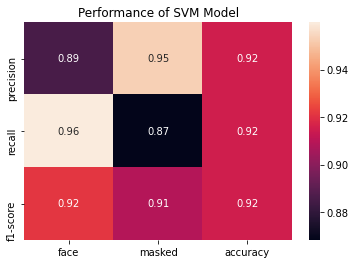

In [ ]:
clf_report = classification_report(true_test, y_predict , output_dict=True)
plotmap = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :3], annot=True, linecolor='black')
plt.title("Performance of SVM Model")

0.9155172413793103

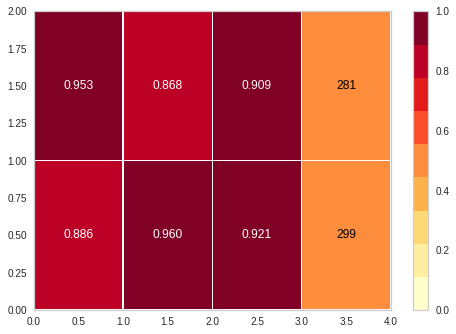

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes = ["Mask", "No Mask"]
visualizer = ClassificationReport(svm.SVC(), classes=classes ,support=True)
visualizer.fit(data, final_target)  # Fit the visualizer and the model
visualizer.score(test_data, true_test)  # Evaluate the model on the test data


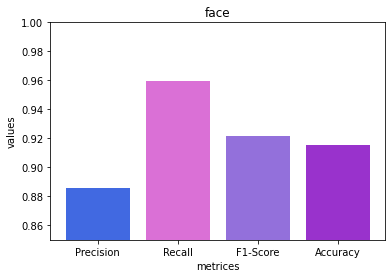

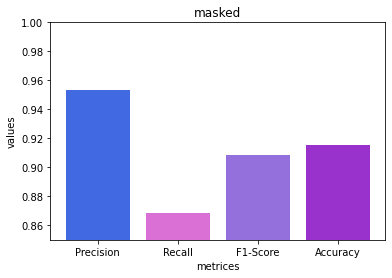

In [ ]:
report_data = classification_report(true_test, y_predict, output_dict=True)
x = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
acc=0
accuracy = 0
for key , value in report_data.items():
  acc+=1
  if(acc==3):
    accuracy = value
i=0
for key,value in report_data.items():
  i+=1
  title = key
  y = []
  if(i==3):
    break
  for k, v in value.items():
    y.append(v)
  y.pop()
  y.append(accuracy)
  plt.ylim([0.85,1.0])
  plt.bar(x,y, color=['royalblue', 'orchid', 'mediumpurple', 'darkorchid'])  
  plt.xlabel('metrices')
  plt.ylabel('values')
  plt.title(title)
  plt.show()
  

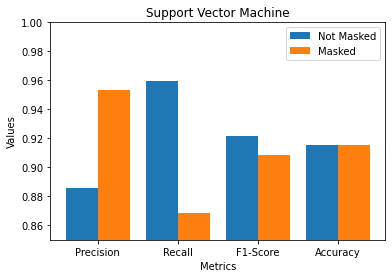

In [ ]:
report_data = classification_report(true_test, y_predict, output_dict=True)
x = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
acc=0
accuracy = 0
y = []
z = []

for key , value in report_data.items():
  acc+=1
  if(acc == 3):
    accuracy = value
    break

  for k , v in value.items():
    if(acc == 1): 
      y.append(v)
    if(acc == 2): 
      z.append(v)
y.pop()
y.append(accuracy)
z.pop()
z.append(accuracy)

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'Not Masked')
plt.bar(x_axis + 0.2, z, 0.4, label = 'Masked')

plt.xticks(x_axis, x)
plt.ylim([0.85,1.0])
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Support Vector Machine")
plt.legend()
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow
train_unmasked = "/content/drive/My Drive/ML Dataset/train/AFDB_face_dataset"
train_masked= "/content/drive/My Drive/ML Dataset/train/AFDB_masked_face_dataset"
test_unmasked= "/content/drive/My Drive/ML Dataset/test/AFDB_face_dataset"
test_masked= "/content/drive/My Drive/ML Dataset/test/AFDB_masked_face_dataset"
image_size = 60


In [ ]:
def train_data():
    train_data_unmasked = [] 
    train_data_masked=[]
    for image1 in tqdm(os.listdir(train_unmasked)): 
        path = os.path.join(train_unmasked, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_unmasked.append(img1) 
    for image2 in tqdm(os.listdir(train_masked)): 
        path = os.path.join(train_masked, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_masked.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_unmasked),np.asarray(train_data_masked)),axis=0)
    return train_data 

In [ ]:
def test_data():
    test_data_unmasked = [] 
    test_data_masked=[]
    for image1 in tqdm(os.listdir(test_unmasked)): 
        #path = os.path.join(test_unmasked, image1)
        path = test_unmasked+'/'+image1
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_unmasked.append(img1) 
    for image2 in tqdm(os.listdir(test_masked)): 
        #path = os.path.join(test_masked, image2)
        path = test_masked+'/'+image2
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_masked.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_unmasked),np.asarray(test_data_masked)),axis=0) 
    return test_data 

In [ ]:
train_data = train_data() 
test_data = test_data()